# Potential Fish Zone Identification



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
np.random.seed(40)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CSV_FILE/sample_nan.csv')
data

,Year,Month,SST,SSC,AT,RH,SLP,TC,TOTALOIL,Label
0,2010,1,28.659535,0.24,27.927021,76.067391,1013.386250,3.438298,48131.725,PFZ
1,2010,2,28.506889,0.19,28.140408,74.979592,1012.342449,2.791837,20158.942,PFZ
2,2010,3,29.359070,0.18,28.922500,76.359574,1012.280417,3.511111,33400.703,NPFZ
3,2010,4,30.385854,0.26,29.801250,78.610417,1009.744792,4.110638,7268.411,NPFZ
4,2010,5,30.749362,0.24,30.292000,77.500000,1008.289600,4.424000,16186.259,NPFZ
...,...,...,...,...,...,...,...,...,...,...
86,2017,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2017,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''
Sea Surface Temperature, Chlorophyll, 
Relative Humidity, Sea Level Pressure, Air Temperature, Total Cloudiness and Total Fish catch data.

'''

'\nSea Surface Temperature, Chlorophyll, \nRelative Humidity, Sea Level Pressure, Air Temperature, Total Cloudiness and Total Fish catch data.\n\n'

**Remove year and Month and Label**

In [ ]:
dataframe=data[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'TOTALOIL']]
dataframe

,SST,SSC,AT,RH,SLP,TC,TOTALOIL
0,28.659535,0.24,27.927021,76.067391,1013.386250,3.438298,48131.725
1,28.506889,0.19,28.140408,74.979592,1012.342449,2.791837,20158.942
2,29.359070,0.18,28.922500,76.359574,1012.280417,3.511111,33400.703
3,30.385854,0.26,29.801250,78.610417,1009.744792,4.110638,7268.411
4,30.749362,0.24,30.292000,77.500000,1008.289600,4.424000,16186.259
...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Shuffle the dataset and apply interpolate method**



In [ ]:
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

In [ ]:
newdf = dataframe.interpolate(method='cubic', axis=0).ffill().bfill()
newdf = newdf.astype("float")
newdf

,SST,SSC,AT,RH,SLP,TC,TOTALOIL
0,29.356190,0.160000,29.117391,77.686667,1009.645435,3.717778,14151.874000
1,29.036667,0.180000,28.596875,81.393617,1007.970417,5.682979,10643.353000
2,28.392000,0.120000,27.458889,74.524444,1009.368636,3.581395,71906.825000
3,28.264561,0.153436,27.206719,72.660818,1011.681495,2.748212,83904.077423
4,28.373095,0.230000,27.545814,74.965854,1013.454318,3.148780,60903.643000
...,...,...,...,...,...,...,...
86,28.832381,0.183171,27.711862,70.788094,1014.585875,1.374129,79499.586720
87,29.088229,0.209585,27.899966,71.835525,1014.541974,1.995630,74813.592810
88,28.749800,0.220000,27.759000,75.864000,1012.828200,3.472000,52246.149000
89,27.470444,0.190000,27.063043,83.360870,1009.054681,5.747826,6259.526000


**Create label**

In [ ]:
ssc = np.array(newdf['SSC'])
sst = np.array(newdf['SST'])
fc = np.array(newdf['TOTALOIL'])

In [ ]:
lab = []
for i in range(len(ssc)):
    if ssc[i]>0.2 and sst[i]>25.0 and fc[i]>10000:
        lab.append("PFZ")
    else:
        lab.append("NPFZ")

In [ ]:
label = pd.DataFrame(lab,columns=['label'])

In [ ]:
dataset = pd.concat([newdf,label],axis=1)
dataset

,SST,SSC,AT,RH,SLP,TC,TOTALOIL,label
0,29.356190,0.160000,29.117391,77.686667,1009.645435,3.717778,14151.874000,NPFZ
1,29.036667,0.180000,28.596875,81.393617,1007.970417,5.682979,10643.353000,NPFZ
2,28.392000,0.120000,27.458889,74.524444,1009.368636,3.581395,71906.825000,NPFZ
3,28.264561,0.153436,27.206719,72.660818,1011.681495,2.748212,83904.077423,NPFZ
4,28.373095,0.230000,27.545814,74.965854,1013.454318,3.148780,60903.643000,PFZ
...,...,...,...,...,...,...,...,...
86,28.832381,0.183171,27.711862,70.788094,1014.585875,1.374129,79499.586720,NPFZ
87,29.088229,0.209585,27.899966,71.835525,1014.541974,1.995630,74813.592810,PFZ
88,28.749800,0.220000,27.759000,75.864000,1012.828200,3.472000,52246.149000,PFZ
89,27.470444,0.190000,27.063043,83.360870,1009.054681,5.747826,6259.526000,NPFZ


In [ ]:
dataset.to_csv("cubic_interpolation.csv",sep='\t', encoding='utf-8')

In [ ]:
# create a copy
dataframe1 = dataset

In [ ]:
# mapping
dataframe1['label']=dataframe1['label'].map({'PFZ':0,'NPFZ':1})

**Drop Total catch**

In [ ]:
df2=dataframe1.drop(['TOTALOIL'],axis=1)
df2.columns

Index(['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'label'], dtype='object')

**Split data and label**

In [ ]:
X = df2[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC']]
Y = df2[['label']]

**normalized the data and label**



In [ ]:
from sklearn import preprocessing

In [ ]:
X_norm = preprocessing.normalize(X, norm='l2')

In [ ]:
y = np.squeeze(np.array(Y).reshape(1,-1))

# Feature importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_norm,y)
feature_importance=model.feature_importances_
print(model.feature_importances_)

[0.15582828 0.52335546 0.10412214 0.07699936 0.07260606 0.06708869]


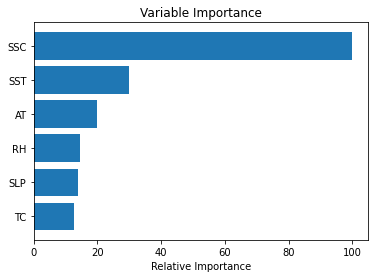

In [ ]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_index = np.argsort(feature_importance)
pos = np.arange(sorted_index.shape[0]) + .8
plt.barh(pos, feature_importance[sorted_index], align='center')
plt.yticks(pos, X.columns[sorted_index])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

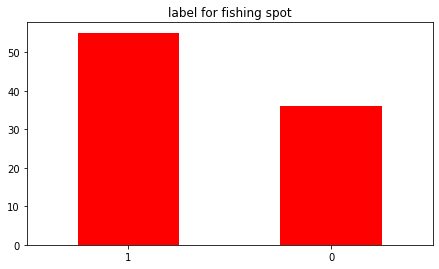

In [ ]:
#Bar Plot of Species

plt.subplot(222) #Change  values of subplot and explore(eg: 111,223,221,etc)
dataset['label'].value_counts().plot(kind='bar', title='label for fishing spot', figsize=(16,9),color ="red")

plt.xticks(rotation=0)

plt.show()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


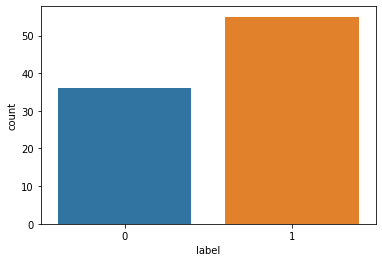

In [ ]:
sns.countplot("label",data=dataset)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


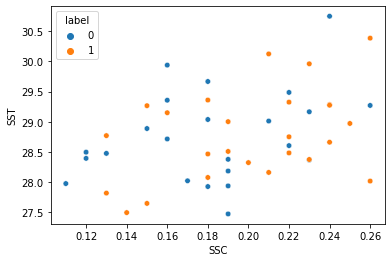

In [ ]:
sns.scatterplot(data["SSC"],data["SST"],hue =dataset["label"],s=30)

[]

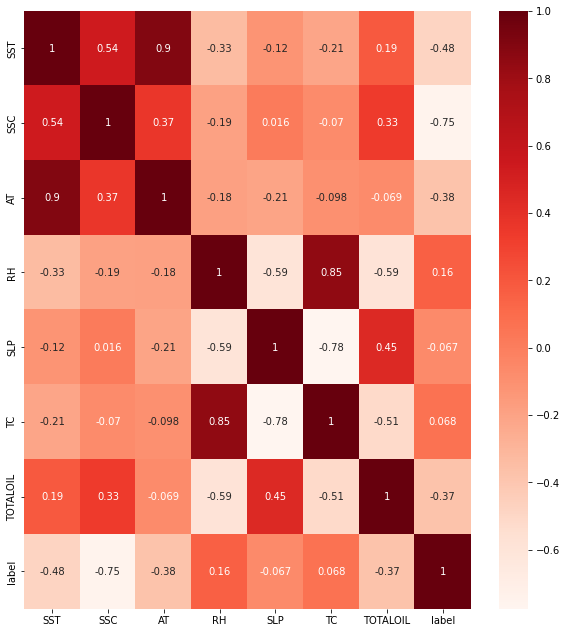

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(dataset.corr(),annot=True,cmap="Reds")
plt.plot()

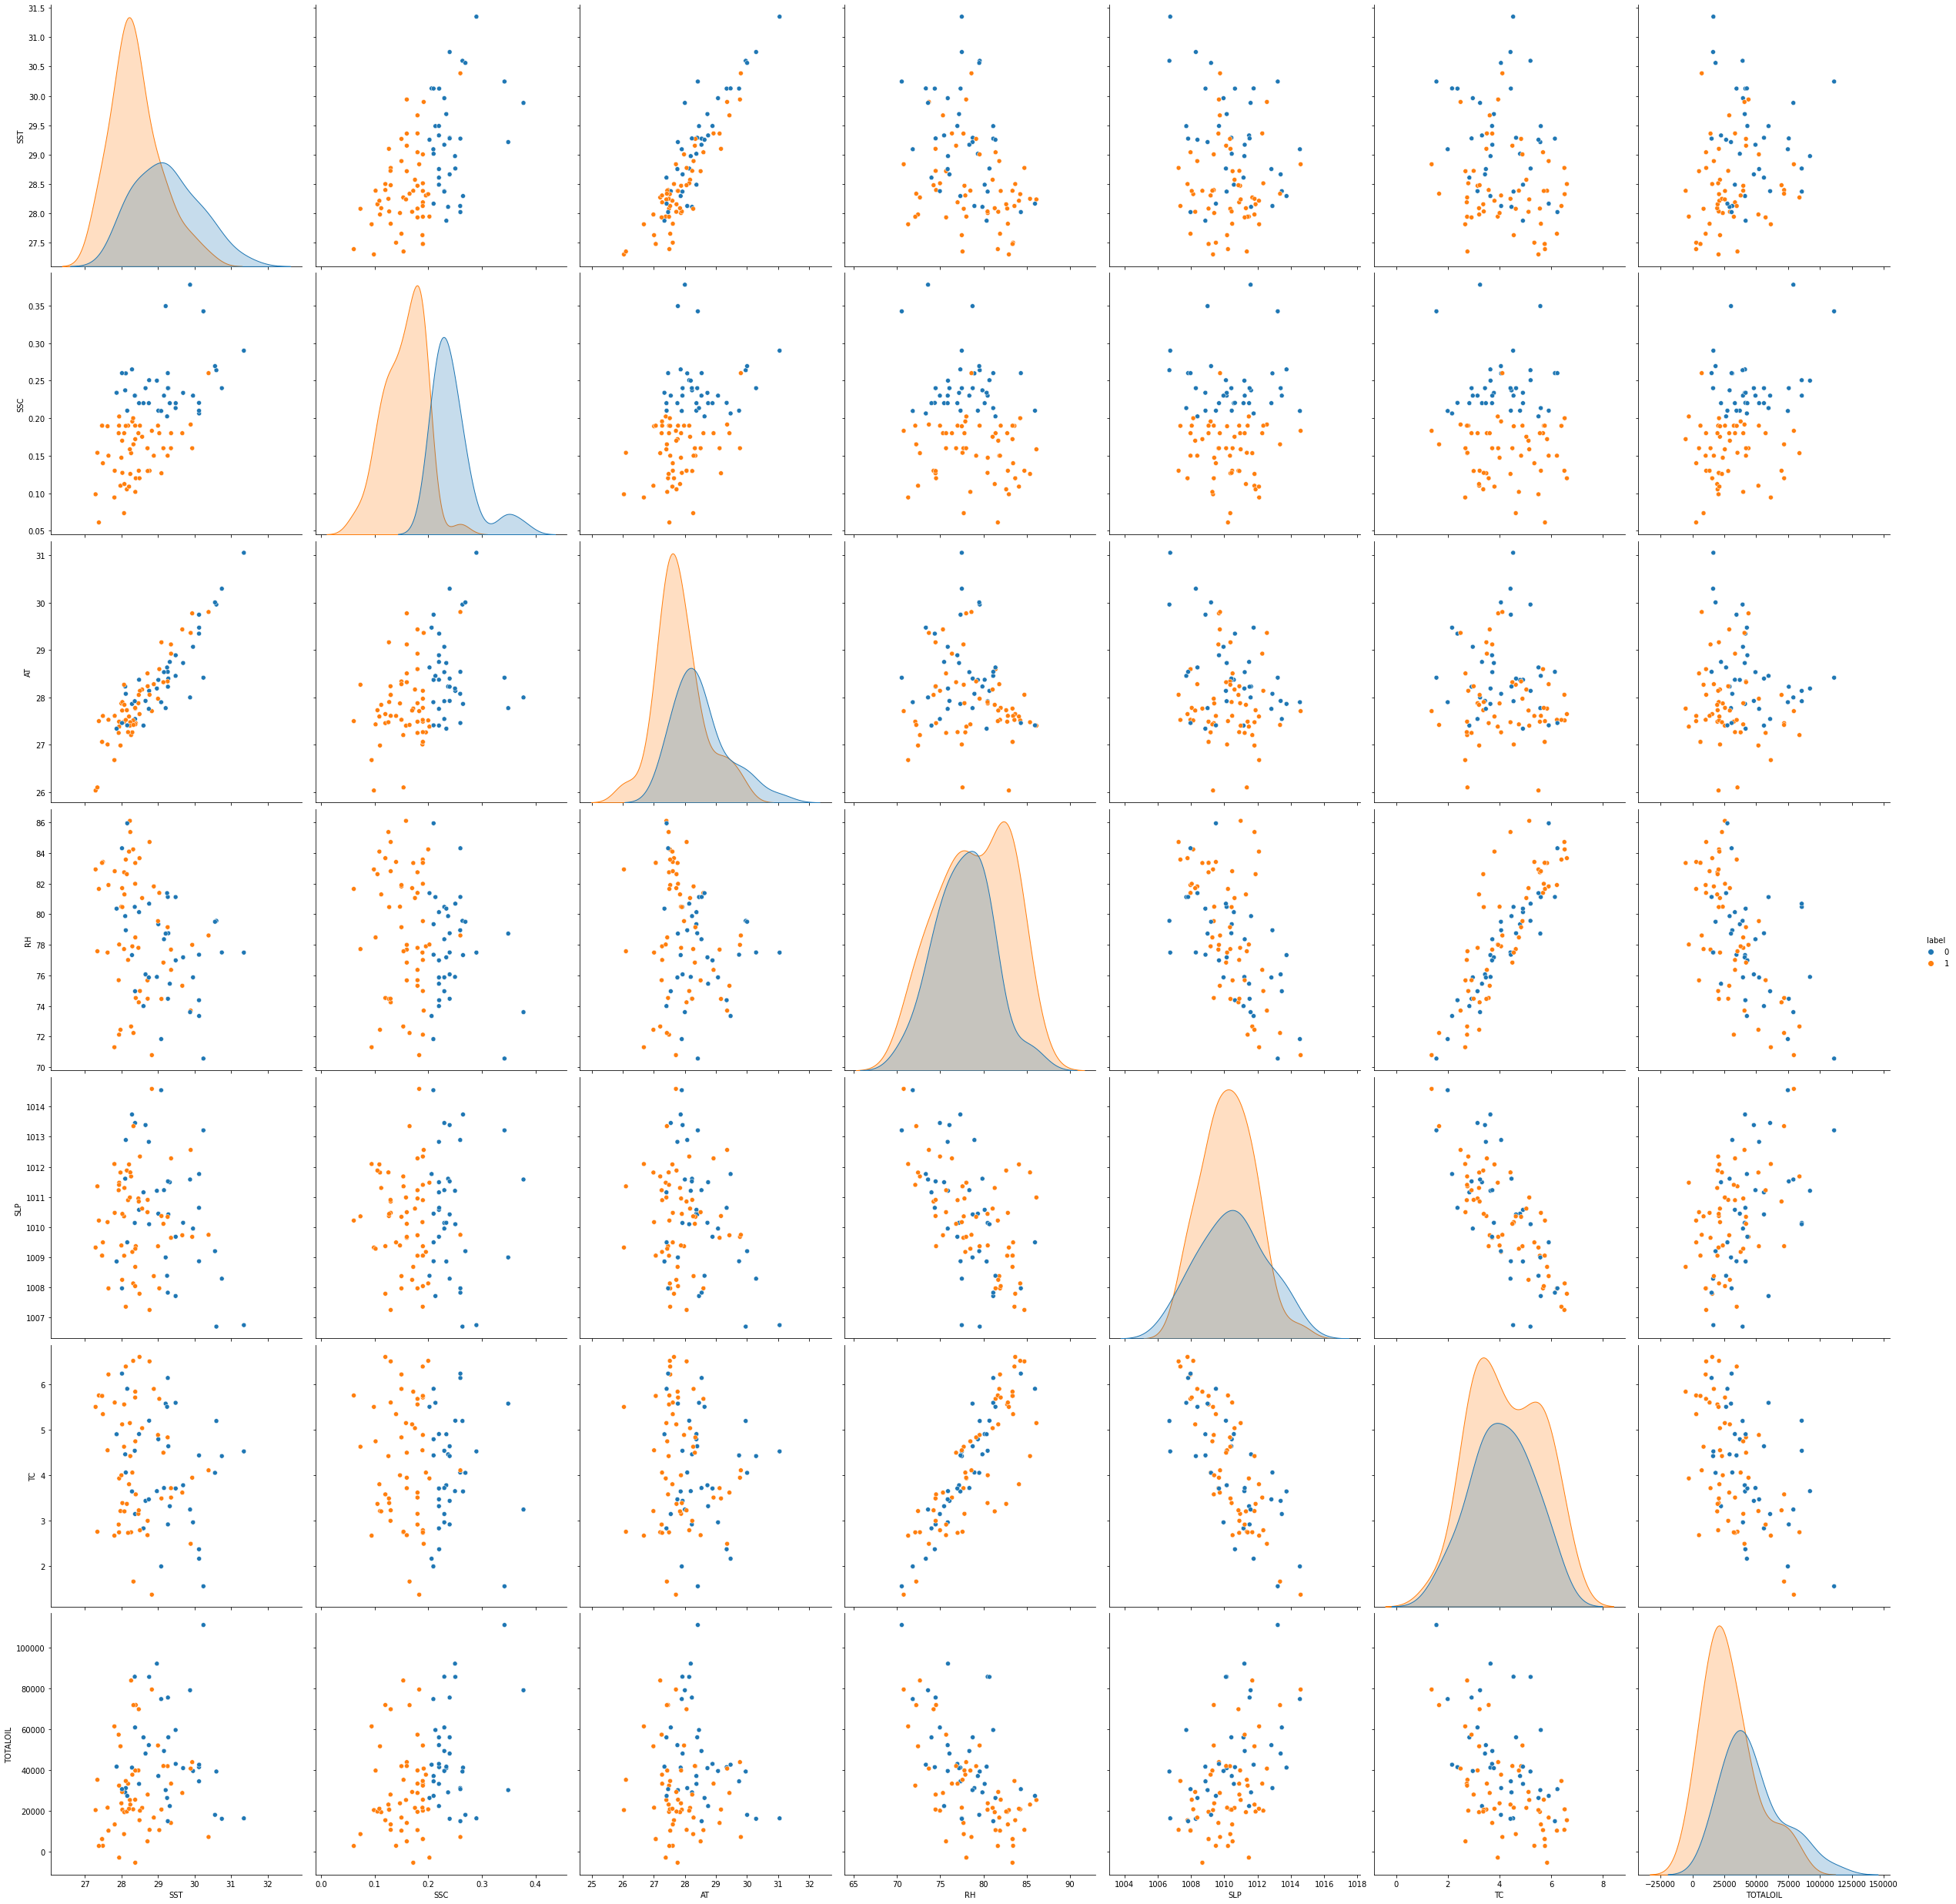

In [ ]:
sns.pairplot(data=dataset,hue="label",height=5)
plt.show()

**apply machine learning**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.33, random_state=40)

# SVM

In [ ]:
from sklearn import svm

In [ ]:
clfr = svm.SVC() # svm classifer

In [ ]:
clfr.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_curve

In [ ]:
result = clfr.predict(X_test)

In [ ]:
confusion_matrix(y_test,result)

array([[ 0,  9],
       [ 0, 22]])

In [ ]:
svm_rs=recall_score(y_test, result)
print(svm_rs)

1.0


In [ ]:
svm_ps=precision_score(y_test, result)
print(svm_ps)

0.7096774193548387


In [ ]:
svm_fs=f1_score(y_test, result)
print(svm_fs)

0.8301886792452831


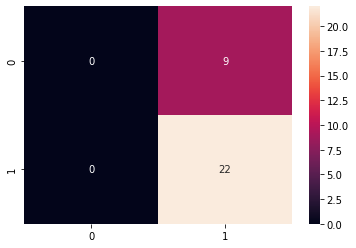

In [ ]:
cm1 = confusion_matrix(y_test,result)
df_cm1 = pd.DataFrame(cm1)
sbn.heatmap(df_cm1, annot=True, fmt='')
plt.show()

In [ ]:
svm_as=accuracy_score(result,y_test)
print(svm_as)

0.7096774193548387


#BOOSTED TREE

In [ ]:
import xgboost as xgb

In [ ]:
model_xgbst = xgb.XGBClassifier() # boosted tree classifire
model_xgbst.fit(X_train,y_train)

XGBClassifier()

In [ ]:
predXGB = model_xgbst.predict(X_test)
bt_as=accuracy_score(predXGB,y_test)
print(bt_as)

1.0


In [ ]:
bt_rs=recall_score(predXGB,y_test)
print(bt_rs)

1.0


In [ ]:
bt_fs=f1_score(predXGB,y_test)
print(bt_fs)

1.0


In [ ]:
bt_ps=precision_score(predXGB,y_test)
print(bt_ps)

1.0


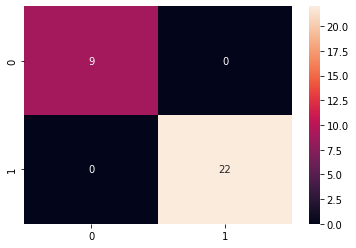

In [ ]:
confusion_matrix(y_test,predXGB)
cm2 = confusion_matrix(y_test,predXGB)
df_cm2 = pd.DataFrame(cm2)
sbn.heatmap(df_cm2, annot=True, fmt='')
plt.show()

In [ ]:
test_set = pd.DataFrame(X_test,columns=['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC'])
prediction = pd.DataFrame(predXGB,columns=['label'])
prediction['label'] = prediction['label'].map({0:'NPFZ',1:'PFZ'})
output = pd.concat([test_set,prediction],axis=1)
output.to_csv("output.csv",sep='\t', encoding='utf-8')

# DECISION TREE

In [ ]:
from sklearn import tree

In [ ]:
dtree= tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
result2 = dtree.predict(X_test)

In [ ]:
dt_as=accuracy_score(y_test,result2)
print(dt_as)

0.967741935483871


In [ ]:
dt_rs=recall_score(y_test,result2)
print(dt_rs)

1.0


In [ ]:
dt_ps=precision_score(y_test,result2)
print(dt_ps)

0.9565217391304348


In [ ]:
dt_fs=f1_score(y_test,result2)
print(dt_fs)

0.9777777777777777


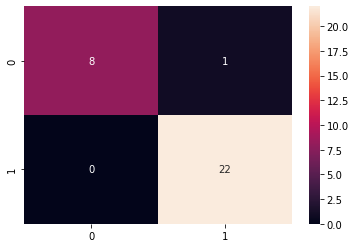

In [ ]:
confusion_matrix(y_test,result2)
cm3 = confusion_matrix(y_test,result2)
df_cm3 = pd.DataFrame(cm3)
sbn.heatmap(df_cm3, annot=True, fmt='')
plt.show()

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
nb_as=accuracy_score(pred,y_test)
print(nb_as)

0.9354838709677419


In [ ]:
nb_rs=recall_score(pred,y_test)
print(nb_rs)

1.0


In [ ]:
nb_ps=precision_score(pred,y_test)
print(nb_ps)

0.9090909090909091


In [ ]:
nb_fs=f1_score(pred,y_test)
print(nb_fs)

0.9523809523809523


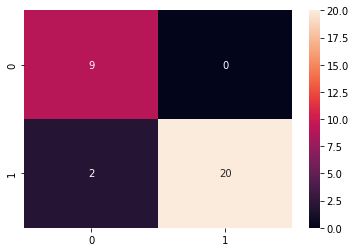

In [ ]:
confusion_matrix(y_test,pred)
cm4 = confusion_matrix(y_test,pred)
df_cm4 = pd.DataFrame(cm4)
sbn.heatmap(df_cm4, annot=True, fmt='')
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(X_train, y_train)
predRF = clfRF.predict(X_test)

In [ ]:
rf_as=accuracy_score(predRF,y_test)
print(rf_as)

1.0


In [ ]:
rf_ps=precision_score(y_test,predRF)
print(rf_ps)

1.0


In [ ]:
rf_rs=recall_score(y_test, predRF)
print(rf_rs)

1.0


In [ ]:
rf_fs=f1_score(y_test,  predRF)
print(rf_fs)

1.0


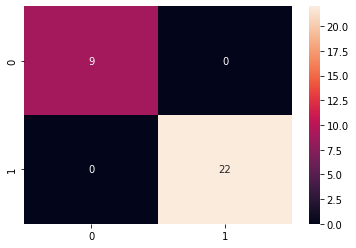

In [ ]:
confusion_matrix(y_test,predRF)
cm5 = confusion_matrix(y_test,predRF)
df_cm5 = pd.DataFrame(cm5)
sbn.heatmap(df_cm5, annot=True, fmt='')
plt.show()

In [ ]:
a=[[28.373095,0.230000,27.545814,74.965854,1013.454318,3.148780]]
preda = clfRF.predict(a)

In [ ]:
preda

array([0])

In [ ]:
if preda==0:
  print('PFZ')
else:
  print('NPFZ')

PFZ


# Comparing Performance of Models

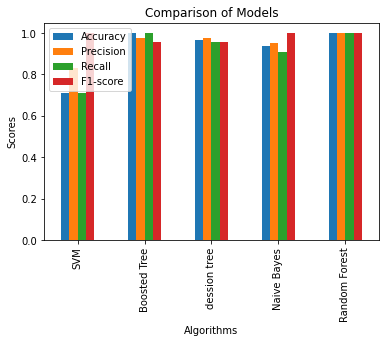

<Figure size 1080x1368 with 0 Axes>

In [ ]:
models_data = pd.DataFrame([['SVM',svm_as,svm_fs, svm_ps, svm_rs], ['Boosted Tree', bt_as,bt_fs, bt_ps, bt_rs],['dession tree',dt_as,dt_fs, dt_ps, dt_rs],
                           ['Naive Bayes',nb_as,nb_fs, nb_ps, nb_rs],['Random Forest',rf_as,rf_fs, rf_ps, rf_rs]],
                          columns = ['Scores','Accuracy', 'Precision', 'Recall', 'F1-score'])

models_data.plot(x='Scores', kind ='bar', stacked = False, title = "Comparison of Models", xlabel = 'Algorithms', ylabel = 'Scores')
plt.figure(figsize = (15, 19))
plt.show()
